In [30]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE



import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [31]:
# read the data and show first 5 rows
data = pd.read_csv(r"C:\Users\user\Desktop\Case study 2\bs140513_032310.csv", low_memory = True)
data.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [33]:
df_dd=data.copy()

In [34]:
#Counting no. of rows and columns
print("Number of rows: {}".format(df_dd.shape[0]))
print("Number of columns: {}".format(df_dd.shape[1]))

Number of rows: 594643
Number of columns: 10


In [35]:
#data types of each columns
df_dd.dtypes

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

Checking Null Values

In [36]:
#Checking number of values 
df_dd.isna().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

Calculating mean,median,mode,standard deviation,minimum and maximum values

In [37]:
# Calculate the summary statistics using describe()
summary = df_dd.describe()

# Access specific statistics from the summary_stats DataFrame
count_values = summary.loc['count']
mean_values = summary.loc['mean']
std_values = summary.loc['std']
min_values = summary.loc['min']
median_values = summary.loc['50%']
max_values = summary.loc['max']

# Calculate the range separately
range_values = max_values - min_values

# Print the results
print("Count:")
print(count_values)

print("\nMean:")
print(mean_values)

print("\nStandard Deviation:")
print(std_values)

print("\nMinimum:")
print(min_values)

print("\nMedian ")
print(median_values)


print("\nMaximum:")
print(max_values)

print("\nRange:")
print(range_values)


Count:
step      594643.0
amount    594643.0
fraud     594643.0
Name: count, dtype: float64

Mean:
step      94.986827
amount    37.890135
fraud      0.012108
Name: mean, dtype: float64

Standard Deviation:
step       51.053632
amount    111.402831
fraud       0.109369
Name: std, dtype: float64

Minimum:
step      0.0
amount    0.0
fraud     0.0
Name: min, dtype: float64

Median 
step      97.0
amount    26.9
fraud      0.0
Name: 50%, dtype: float64

Maximum:
step       179.00
amount    8329.96
fraud        1.00
Name: max, dtype: float64

Range:
step       179.00
amount    8329.96
fraud        1.00
dtype: float64


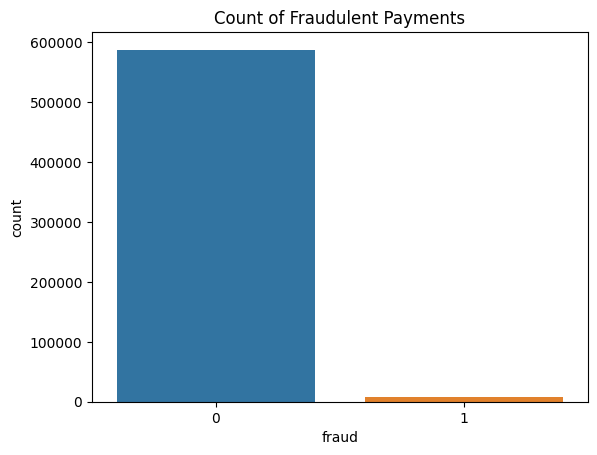

Number of normal examples:  587443
Number of fradulent examples:  7200


In [38]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df_dd.loc[data.fraud == 1] 
df_non_fraud = df_dd.loc[data.fraud == 0]

sns.countplot(x="fraud",data=data)
plt.title("Count of Fraudulent Payments")
plt.show()
print("Number of normal examples: ",df_non_fraud.fraud.count())
print("Number of fradulent examples: ",df_fraud.fraud.count())


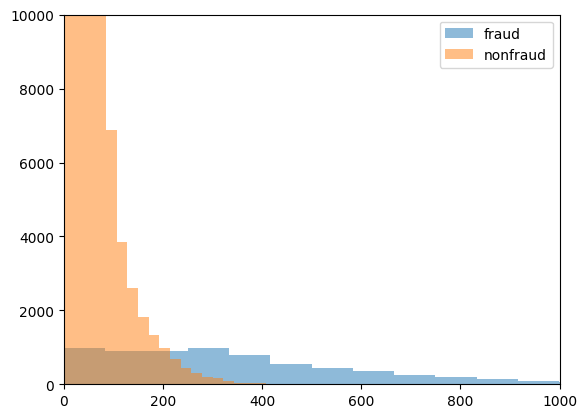

In [39]:
plt.hist(df_fraud.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud',bins=100)

plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

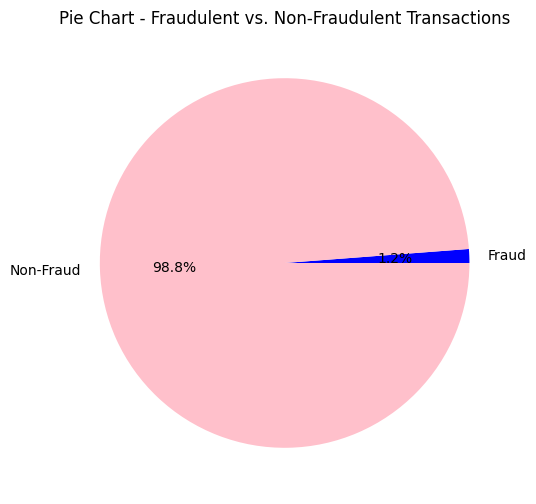

In [40]:
fcount = df_dd['fraud'].sum()
nfcount = len(df_dd) - fcount

# Create the pie chart
labels = ['Fraud', 'Non-Fraud']
sizes = [fcount, nfcount]
colors = ['blue', 'pink']


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Pie Chart - Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

In [41]:
print("Unique zipCodeOri values: ",df_dd.zipcodeOri.nunique())
print("Unique zipMerchant values: ",df_dd.zipMerchant.nunique())
# dropping zipcodeori and zipMerchant since they have only one unique value
data_reduced = df_dd.drop(['zipcodeOri','zipMerchant'],axis=1)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [42]:
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reduced[col] = data_reduced[col].astype('category')
# categorical values ==> numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)
data_reduced.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   30.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    176233
           1       0.24      0.98      0.39      2160

    accuracy                           0.96    178393
   macro avg       0.62      0.97      0.68    178393
weighted avg       0.99      0.96      0.97    178393

Confusion Matrix of Random Forest Classifier: 
 [[169519   6714]
 [    40   2120]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


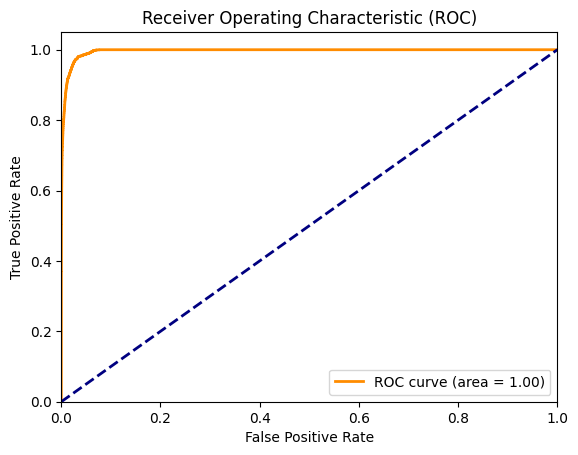

In [43]:
X = data_reduced.drop('fraud', axis=1)
y = data_reduced['fraud']
numerical_columns = ['step', 'amount']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Scale numerical variables
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Initialize and train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, verbose=1, class_weight="balanced")
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the classifier
print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(y_test, y_pred))

# Plot ROC curve and calculate ROC AUC score
fpr, tpr, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()